<a href="https://colab.research.google.com/github/Amanr1996/ML_YesBankPrice_Pred_cap_project/blob/main/Final_YesBankPricePredML_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Yesbank stock price prediction.**



##### **Project Type**    - Regression
##### **Contribution**    - Individual


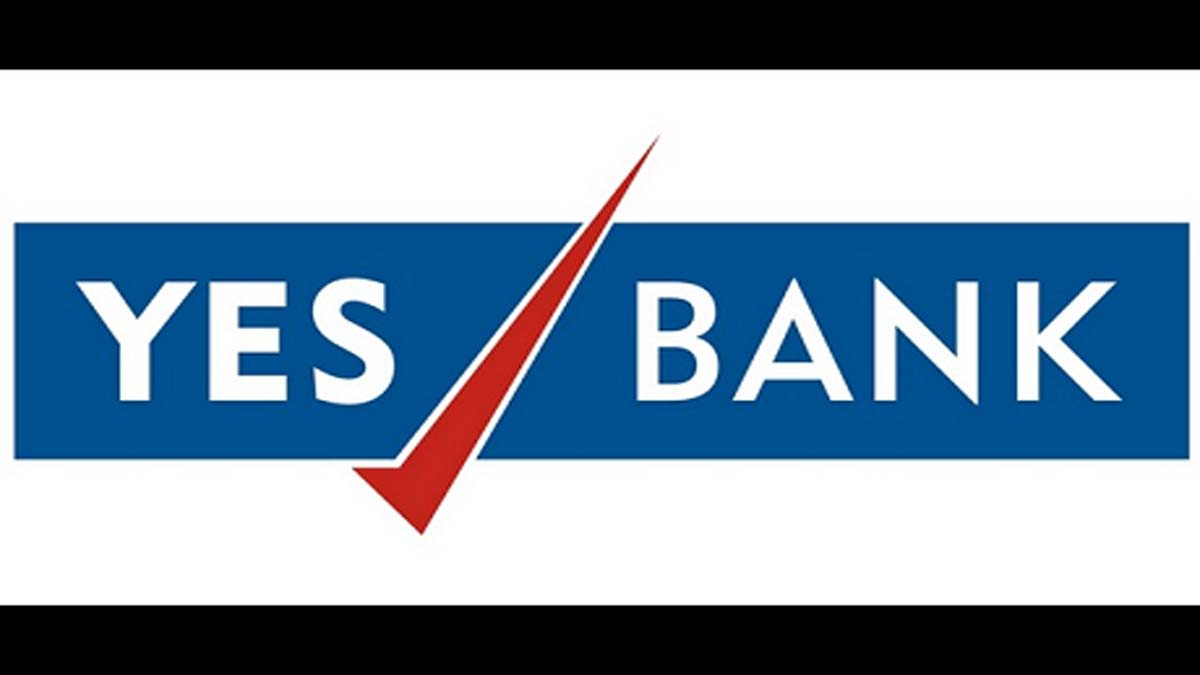

# **Project Summary -**

Yes Bank is a prominent Indian private sector bank, headquartered in Mumbai, Maharashtra. It was founded in 2004 by Rana Kapoor and Late Ashok Kapur. The bank offers a wide range of financial products and services including corporate and institutional banking, retail banking, business banking, and wealth management services. It has a pan-India presence with branches and ATMs spread across the country. However, in recent years, the bank has faced some challenges and uncertainties, including governance issues and financial irregularities. Therefore, analyzing the stock prices of Yes Bank can provide insights into the bank's financial health and market performance.

# **GitHub Link -**  https://github.com/Amanr1996/ML_YesBankPrice_Pred_cap_project/blob/main/Final_YesBankPricePredML_.ipynb



# **Problem Statement**


The problem at hand is to predict the closing price of Yes Bank stock using historical data. The dataset consists of daily stock prices for Yes Bank from May 2005 to September 2020. The aim is to build a regression model that takes into account the opening, high and low prices of the stock as input features and outputs the predicted closing price for the next day.

The model will be trained on the historical data and will be evaluated on a test set of data. The performance of the model will be measured using metrics such as Mean Squared Error (MSE), Root Mean Squared Error (RMSE), R-squared (R2) score, and Mean Absolute Scaled Error (MASE).

#**The main objective is to build an accurate and reliable model that can be used to make predictions about the future closing price of Yes Bank stock. Such a model would be of great value to investors and traders who are looking to make informed decisions about buying, selling, or holding Yes Bank stock.**


# **General Guidelines** : -  

# ***Let's Begin !***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)
plt.rcParams['figure.figsize'] = 14, 8


### Dataset Loading

In [2]:
# Load Dataset
path = "/content/data_YesBank_StockPrices.csv"
df = pd.read_csv(path)

### Dataset First View

In [3]:
# Dataset First Look
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [4]:
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [5]:
df.sample(5)

,Date,Open,High,Low,Close
52,Nov-09,46.58,54.98,42.84,50.57
10,May-06,19.80,21.80,15.80,18.03
14,Sep-06,18.00,18.88,16.80,18.46
11,Jun-06,18.20,18.40,13.40,15.62
96,Jul-13,92.40,100.40,57.71,64.76


In [6]:
df.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


### Dataset Rows & Columns count

In [7]:
## name of columns.
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [8]:
# Dataset Rows & Columns count
df.shape

(185, 5)

### Dataset Information

In [9]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [10]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [11]:
# Missing Values/Null Values Count
df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

There are no missing values in the data set.


### What do we Know about dataset?

1. There are 5 columns and 185 rows in the data set.
2. Open, High, Low, Close, These columns are in Float64 data type.
3. Data set having no missing value.
4. Column "Date" is in objet formate.

**Change the formate of the date column**

In [12]:
## changing Dtype of the "Date" column
df['Date'] = pd.to_datetime(df['Date'], format='%b-%y')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

In [13]:
df["Date"]

0     2005-07-01
1     2005-08-01
2     2005-09-01
3     2005-10-01
4     2005-11-01
         ...    
180   2020-07-01
181   2020-08-01
182   2020-09-01
183   2020-10-01
184   2020-11-01
Name: Date, Length: 185, dtype: datetime64[ns]

## ***2. Understanding  Variables***

In [14]:
# Dataset Columns

In [15]:
# Dataset Describe
df.describe()

,Open,High,Low,Close,Year,Month
count,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703,2012.702703,6.567568
std,98.879850,106.333497,91.219415,98.583153,4.471315,3.446332
min,10.000000,11.240000,5.550000,9.980000,2005.000000,1.000000
25%,33.800000,36.140000,28.510000,33.450000,2009.000000,4.000000
50%,62.980000,72.550000,58.000000,62.540000,2013.000000,7.000000
75%,153.000000,169.190000,138.350000,153.300000,2017.000000,10.000000
max,369.950000,404.000000,345.500000,367.900000,2020.000000,12.000000


### Variables Description 

**features present in the Data set**:-

* Date :- The date (Month and Year provided)

* Open :- The price of the stock at the beginning of a particular time period.
* High :-The Peak(Maximum) price at which a stock traded during the period.
* Low :-The Lowest price at which a stock traded during the period.
* Close :- The trading price at the end (in this case end of the month).

## 3. ***Data Wrangling***

### Data Wrangling Code

* Handling missing or null values
* Handling duplicate data
* Handling outliers and extreme values
* Handling inconsistent data types
* Data transformation and cleaning

In [16]:
## changing Dtype of the "Date" column
df['Date'] = pd.to_datetime(df['Date'], format='%b-%y')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

In [17]:
# Write your code to make your dataset analysis ready.
df.corr()

,Open,High,Low,Close,Year,Month
Open,1.000000,0.993040,0.983978,0.977971,0.624325,-0.034239
High,0.993040,1.000000,0.983422,0.985051,0.638603,-0.042511
Low,0.983978,0.983422,1.000000,0.995358,0.599056,-0.041818
Close,0.977971,0.985051,0.995358,1.000000,0.608408,-0.055796
Year,0.624325,0.638603,0.599056,0.608408,1.000000,-0.063055
Month,-0.034239,-0.042511,-0.041818,-0.055796,-0.063055,1.000000


In [18]:
## Lets find out the correlation between every variables.
col_list = list(df.columns)
for i in  col_list:
  if i != 'Date': # Here We Are not considering Date column.
    print(f"Correlation with '{i}'")
    print(df.corr()[i])
  

Correlation with 'Open'
Open     1.000000
High     0.993040
Low      0.983978
Close    0.977971
Year     0.624325
Month   -0.034239
Name: Open, dtype: float64
Correlation with 'High'
Open     0.993040
High     1.000000
Low      0.983422
Close    0.985051
Year     0.638603
Month   -0.042511
Name: High, dtype: float64
Correlation with 'Low'
Open     0.983978
High     0.983422
Low      1.000000
Close    0.995358
Year     0.599056
Month   -0.041818
Name: Low, dtype: float64
Correlation with 'Close'
Open     0.977971
High     0.985051
Low      0.995358
Close    1.000000
Year     0.608408
Month   -0.055796
Name: Close, dtype: float64
Correlation with 'Year'
Open     0.624325
High     0.638603
Low      0.599056
Close    0.608408
Year     1.000000
Month   -0.063055
Name: Year, dtype: float64
Correlation with 'Month'
Open    -0.034239
High    -0.042511
Low     -0.041818
Close   -0.055796
Year    -0.063055
Month    1.000000
Name: Month, dtype: float64


**We dont need date and year Columns so we decided to Drop these columns**

In [19]:
df.head()

,Date,Open,High,Low,Close,Year,Month
0,2005-07-01,13.00,14.00,11.25,12.46,2005,7
1,2005-08-01,12.58,14.88,12.55,13.42,2005,8
2,2005-09-01,13.48,14.87,12.27,13.30,2005,9
3,2005-10-01,13.20,14.47,12.40,12.99,2005,10
4,2005-11-01,13.35,13.88,12.88,13.41,2005,11


### What all manipulations have you done and insights you found?

from the above dat we can make following assumptions
1. Year column having least corelation with every variables.
2. Month column is highly negative correlation with the variable.
3. Every Variables are highly correlated to each other.
4. As we have limited data there is no chance of deleting the columns that might effect on the overall result.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

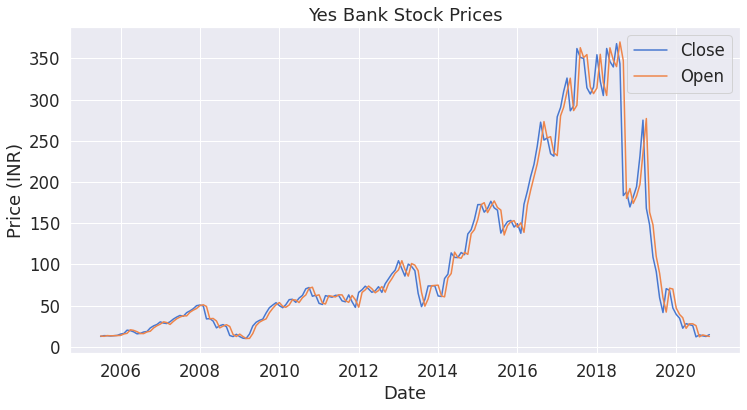

In [20]:
# Plotting the stock prices over time
sns.set_style('darkgrid')
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Close')
plt.plot(df['Date'], df['Open'], label='Open')
plt.title('Yes Bank Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.show()

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

We can clearly  see two outliers 

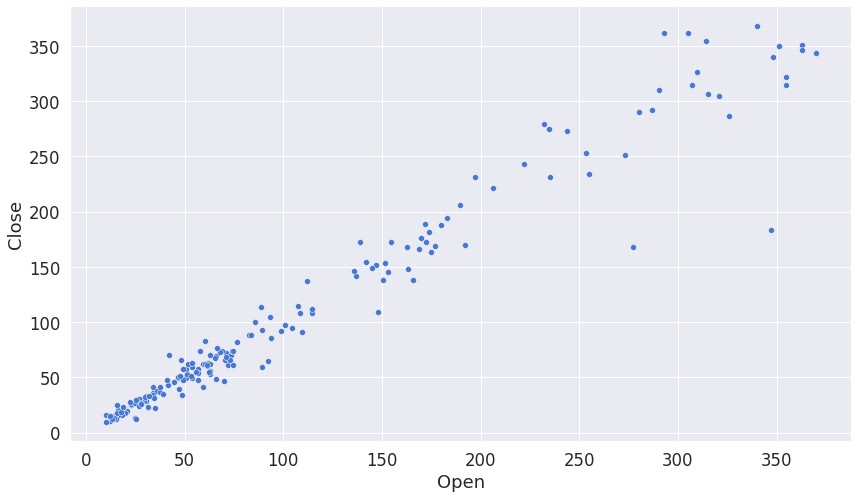

In [21]:
# Chart - 1 visualization code
# Create a scatter plot of Opening_price vs. Closing_price
sns.scatterplot(x='Open', y='Close', data=df)
plt.show()

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

We can clearly  see two outliers 

#### Chart - 2

array([[<Axes: title={'center': 'Date'}>,
        <Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>],
       [<Axes: title={'center': 'Low'}>,
        <Axes: title={'center': 'Close'}>,
        <Axes: title={'center': 'Year'}>],
       [<Axes: title={'center': 'Month'}>, <Axes: >, <Axes: >]],
      dtype=object)

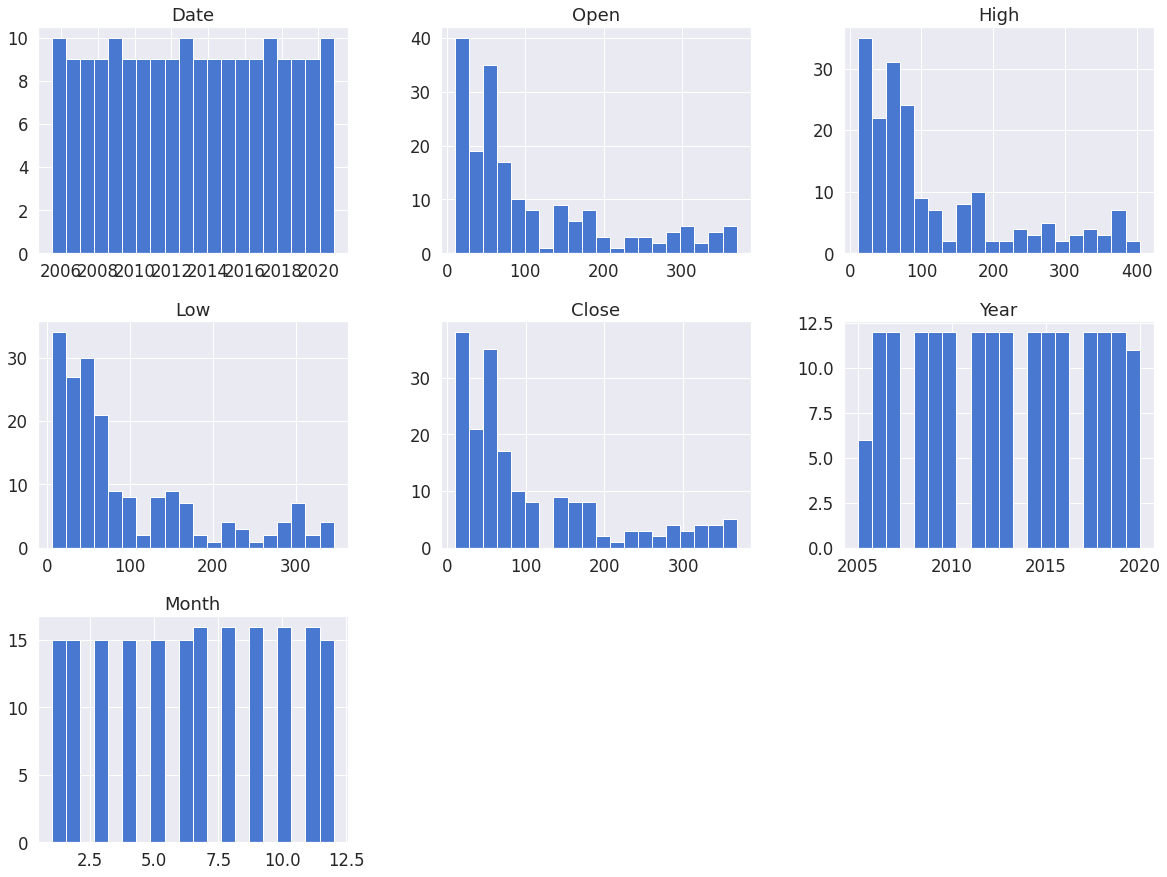

In [22]:
# Chart - 2 visualization code
df.hist(bins = 20, figsize=(20,15))

Insights we found -
1. in the most of the features the price range is in between 0-50

#### Chart - 3

array([[<Axes: xlabel='Open', ylabel='Open'>,
        <Axes: xlabel='High', ylabel='Open'>,
        <Axes: xlabel='Low', ylabel='Open'>,
        <Axes: xlabel='Close', ylabel='Open'>,
        <Axes: xlabel='Year', ylabel='Open'>,
        <Axes: xlabel='Month', ylabel='Open'>],
       [<Axes: xlabel='Open', ylabel='High'>,
        <Axes: xlabel='High', ylabel='High'>,
        <Axes: xlabel='Low', ylabel='High'>,
        <Axes: xlabel='Close', ylabel='High'>,
        <Axes: xlabel='Year', ylabel='High'>,
        <Axes: xlabel='Month', ylabel='High'>],
       [<Axes: xlabel='Open', ylabel='Low'>,
        <Axes: xlabel='High', ylabel='Low'>,
        <Axes: xlabel='Low', ylabel='Low'>,
        <Axes: xlabel='Close', ylabel='Low'>,
        <Axes: xlabel='Year', ylabel='Low'>,
        <Axes: xlabel='Month', ylabel='Low'>],
       [<Axes: xlabel='Open', ylabel='Close'>,
        <Axes: xlabel='High', ylabel='Close'>,
        <Axes: xlabel='Low', ylabel='Close'>,
        <Axes: xlabel='Close', y

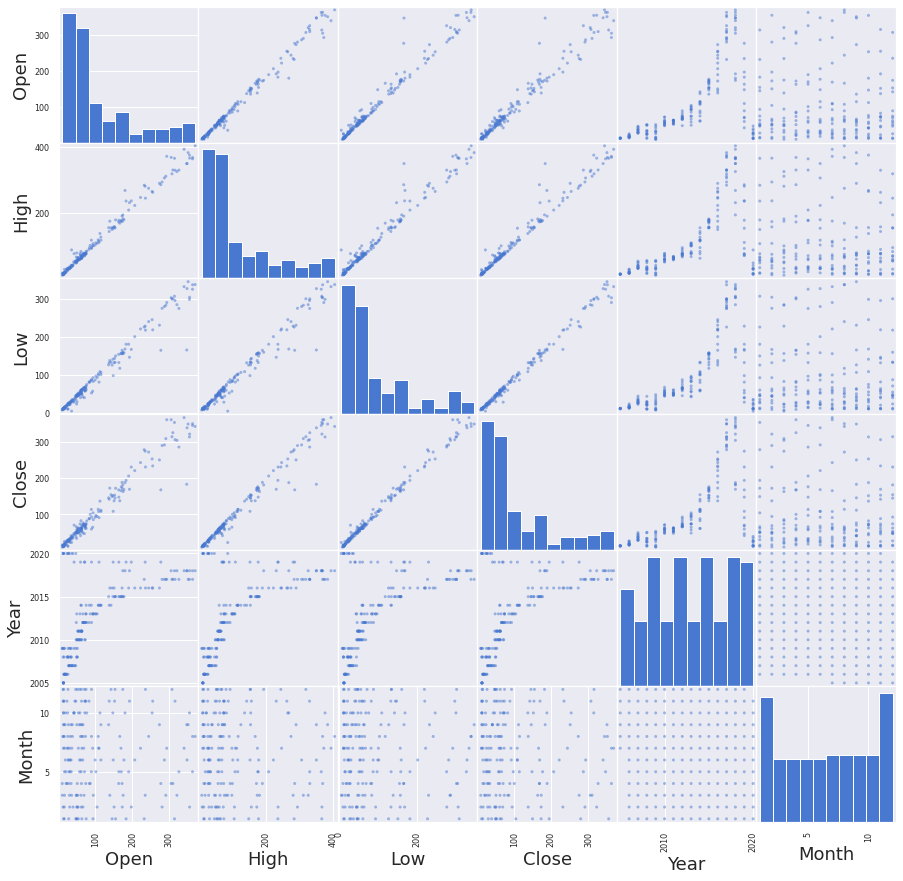

In [23]:
# Chart - 3 visualization code
from pandas.plotting import scatter_matrix ## importing the library  for ploting multiple scatter plots in one go.
attributes = list(df.columns) ## giving the list of the columns.
scatter_matrix(df[attributes], figsize = (15,15))

#### Chart - 4

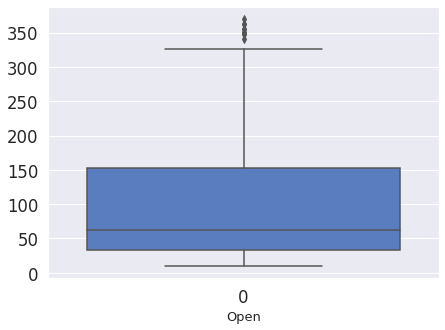

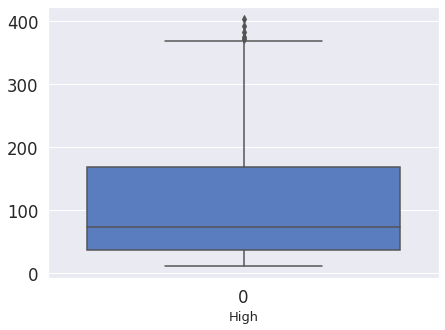

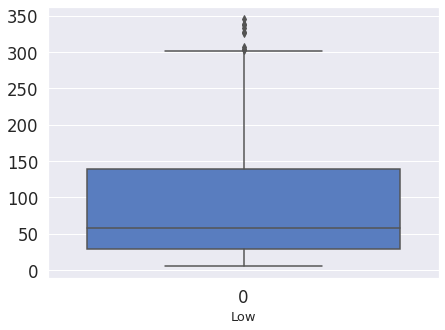

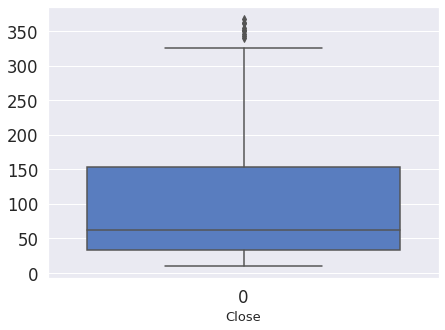

In [24]:
# Checking all features for presence of outliers.
for col in df.columns:
  if col not in ["Date", "Year", "Month"]:
    plt.figure(figsize=(7,5))
    sns.boxplot(df[col])
    plt.xlabel(col, fontsize=13)
    plt.show()
      

Box plot is used for outlier Detection 

As we can see there are some outliers present in our data. We will need to deal with these before proceeding to modelling.

#### Chart - 5

Probablity distribution for Open


<ipython-input-25-adca77c91514>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], color='y')


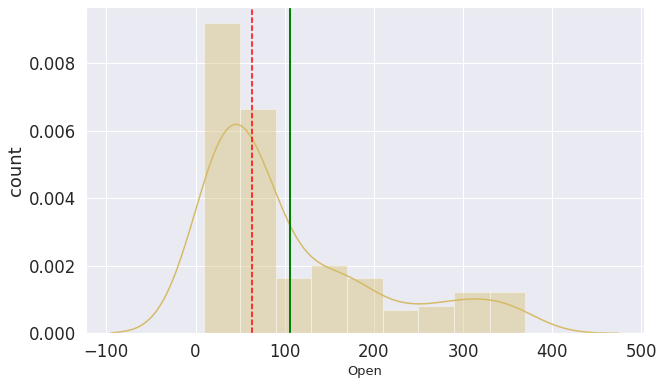

Probablity distribution for High


<ipython-input-25-adca77c91514>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], color='y')


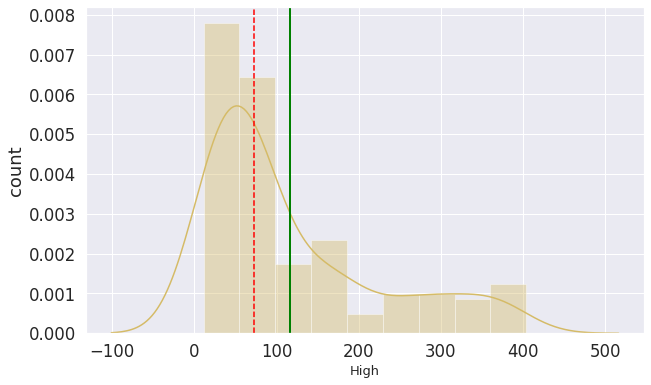

Probablity distribution for Low


<ipython-input-25-adca77c91514>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], color='y')


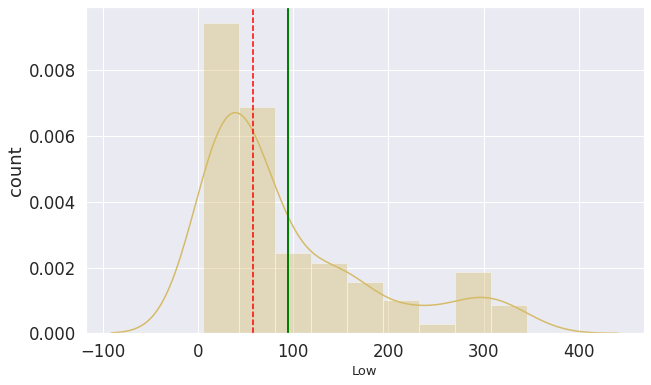

Probablity distribution for Close


<ipython-input-25-adca77c91514>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], color='y')


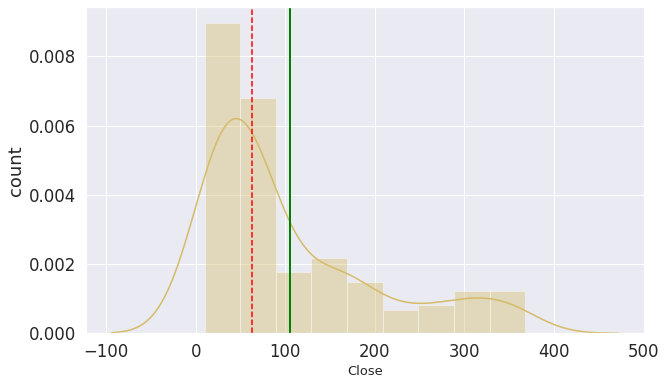

In [25]:
# Chart - 5 visualization code

# Plotting the distributions of all features.
for col in df.columns:
  if col not in ["Month", "Year", "Date"]:
    print("Probablity distribution for", col)
    plt.figure(figsize=(10,6))
    sns.distplot(df[col], color='y')
    plt.xlabel(col, fontsize=13)
    plt.ylabel('count')

    # Plotting the mean and the median.
    plt.axvline(df[col].mean(),color='green',linewidth=2)                            # axvline plots a vertical line at a value (mean in this case). 
    plt.axvline(df[col].median(),color='red',linestyle='dashed',linewidth=1.5)
    plt.show()

* To se the probability distribution of the features 

* To See the skewness of the data.




* All features in the data set are positively skewed.

#### Chart - 6

#### Chart - 7 - Correlation Heatmap

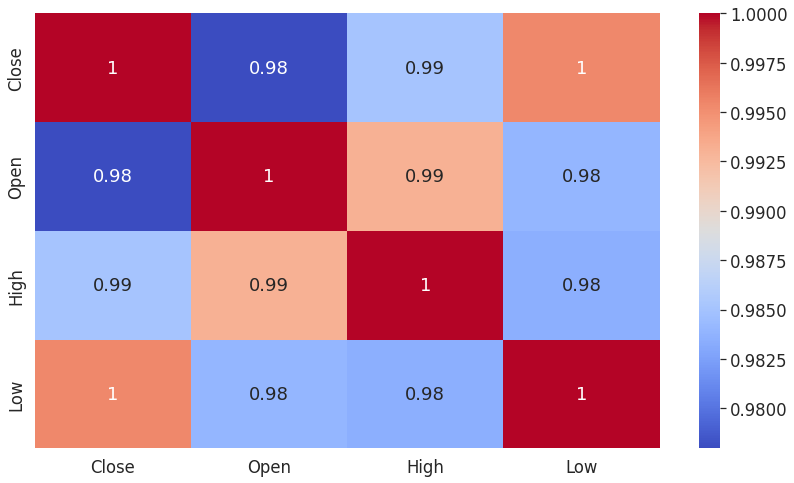

In [26]:
# Correlation Heatmap visualization code
# Chart - 6 visualization code
# Create a heatmap of the correlation between Closing_price, Opening_price, Highest_price, and Lowest_price
corr = df[['Close', 'Open', 'High', 'Low']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

All Variables are highly correlated to each other.

#### Chart - 8 - Pair Plot 

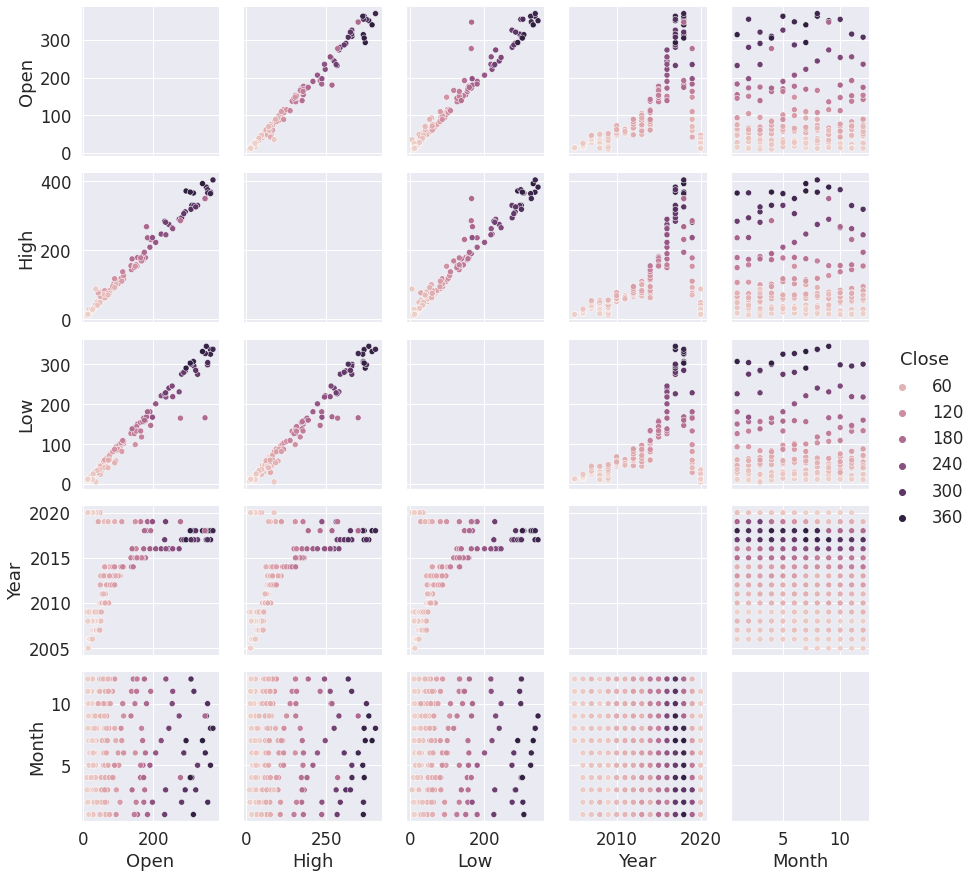

In [27]:
# Pair Plot visualization code
# Chart - 12 visualization code # Pair Plot visualization code
sns.pairplot(df, hue="Close")


## ***5. Hypothesis Testing***

Answer Here.

### Hypothetical Statement - 1

1. Test whether there is a significant linear relationship between the opening price and the closing price of Yes Bank stock.

* Null hypothesis: There is no significant linear relationship between the opening price and the closing price of Yes Bank stock.

* Alternative hypothesis: There is a significant linear relationship between the opening price and the closing price of Yes Bank stock.

#### 2. Perform an appropriate statistical test.

In [28]:
# Perform Statistical Test to obtain P-Value
# Import necessary libraries.
from scipy.stats import pearsonr


# Calculate the Pearson correlation coefficient and p-value
corr, p = pearsonr(df['Open'], df['Close'])

# Print the results
print('Pearson correlation coefficient:', corr)
print('p-value:', p)

# Check the significance level
alpha = 0.05
if p < alpha:
    print('Reject null hypothesis')
else:
    print('Fail to reject null hypothesis')

Pearson correlation coefficient: 0.9779710062230932
p-value: 1.852774505867169e-126
Reject null hypothesis


##### Which statistical test have you done to obtain P-Value?

1. The statistical test used to obtain the p-value for hypothesis tests is the parametric test.
2. Hypothesis test used the Pearson correlation test.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Based on the Pearson correlation test, we can conclude that there is a significant linear relationship between the opening price and the closing price of Yes Bank stock (p-value < 0.05). Therefore, we reject the null hypothesis that there is no correlation between the opening price and the closing price.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

There are no missing values in the data set.

### 2. Handling Outliers

##### What all outlier treatment techniques have you used and why did you use those techniques?

* since We have very limited set of data we cannot remove Oultliers

* instead we will use log Transformation in next steps.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [29]:
###we have to drop the date date month year columns.
df.drop(["Date","Year", "Month"], axis = 1)

,Open,High,Low,Close
0,13.00,14.00,11.25,12.46
1,12.58,14.88,12.55,13.42
2,13.48,14.87,12.27,13.30
3,13.20,14.47,12.40,12.99
4,13.35,13.88,12.88,13.41
...,...,...,...,...
180,25.60,28.30,11.10,11.95
181,12.00,17.16,11.85,14.37
182,14.30,15.34,12.75,13.15
183,13.30,14.01,12.11,12.42


#### 2. Feature Selection

In [30]:
# Manipulate Features to minimize feature correlation and create new features

x = df[['Open', 'High', 'Low']]
y = df['Close']

In [31]:
print(x.head())
print(y.head())

    Open   High    Low
0  13.00  14.00  11.25
1  12.58  14.88  12.55
2  13.48  14.87  12.27
3  13.20  14.47  12.40
4  13.35  13.88  12.88
0    12.46
1    13.42
2    13.30
3    12.99
4    13.41
Name: Close, dtype: float64


### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

* While analysing the dat we found that the data is positively skewed so we have to transform the data according to that.

* For that we will use the log transformation which most suitable for the positively skewed data.

In [32]:
# Transforming data.

# Handle outliers and skewness in the dataset using log transformation
#x_trfm = np.log(x)
#y_trfm = np.log(y)
x_trfm = np.log10(x). values  # applying log transform on our independent variables.

y_trfm =  np.log10(y).values  # applying log transform on our dependent variables.


### 8. Data Splitting

In [33]:
# Split your data to train and test. Choose Splitting ratio wisely.


from sklearn.model_selection import train_test_split    ## importing the library to train test split.

x_train, x_test, y_train, y_test = train_test_split(x_trfm, y_trfm, test_size = 0.2, random_state= 45)   ##  spliting the data


##### What data splitting ratio have you used and why? 

* Using 80% data for model traing.
* Using 20% data for model test
* We Have given shuffling parameter a int value whch is 45.

### 6. Data Scaling

*Scaling the data is very important for us so as to avoid giving more importance to features with large values. This is achieved by normalization or standardization of the data.*

In [34]:
# Scaling your data
## lets import the library for preposing.
from sklearn.preprocessing import StandardScaler

sts = StandardScaler()   # Standardize the training and testing sets


x_train_sts = sts.fit_transform(x_train)  ## storing transformed data in new variable.


x_test_sts = sts.transform(x_test)    ## storing transformed data in new variable.


##### Which method have you used to scale you data and why?
Scaling the data is very important for us so as to avoid giving more importance to features with large values. This is achieved by normalization or standardization of the data.

#**Model Implementation**

**Linear Regression Model**

In [35]:
# importing LinearRegression model and the metrics that we will use for evaluating different models performance.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score 


lr = LinearRegression() ## storing it in variable.

lr.fit(x_train_sts, y_train)

LinearRegression()

In [36]:
y_pred_train_lr = lr.predict(x_train_sts)

In [37]:
## lets predict the test data

y_pred_test_lr = lr.predict(x_test_sts)

In [38]:
# Evaluate the model using metrics such as MSE, RMSE, R2 score, and MASE
mse = mean_squared_error(y_test, y_pred_test_lr)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_test_lr)
mase = np.mean(np.abs((y_test - y_pred_test_lr) / y_test))

print('MSE:', mse)
print('RMSE:', rmse)
print('R2 score:', r2)
print('MASE:', mase)

MSE: 0.00100234209891694
RMSE: 0.03165978677939793
R2 score: 0.9953823819602713
MASE: 0.012754876021031392


In [39]:
## ## cross Validating the method on testing data.
LR_RMSE = np.mean(np.abs(cross_val_score (lr,x_test_sts, 10**y_pred_test_lr, scoring = "neg_root_mean_squared_error", cv = 10)))
print("LR_RMSE:", LR_RMSE)

LR_MSE = np.mean(np.abs(cross_val_score (lr,x_test_sts, 10**y_pred_test_lr, scoring = "neg_mean_squared_error", cv = 10)))
print("LR_MSE:", LR_MSE)

LR_R2 = np.mean(np.abs(cross_val_score (lr,x_test_sts, 10**y_pred_test_lr, scoring = "r2", cv = 3)))
print("LR_R2:",LR_R2)

LR_RMSE: 44.20000904567296
LR_MSE: 2278.3956439591866
LR_R2: 0.7300018317788325


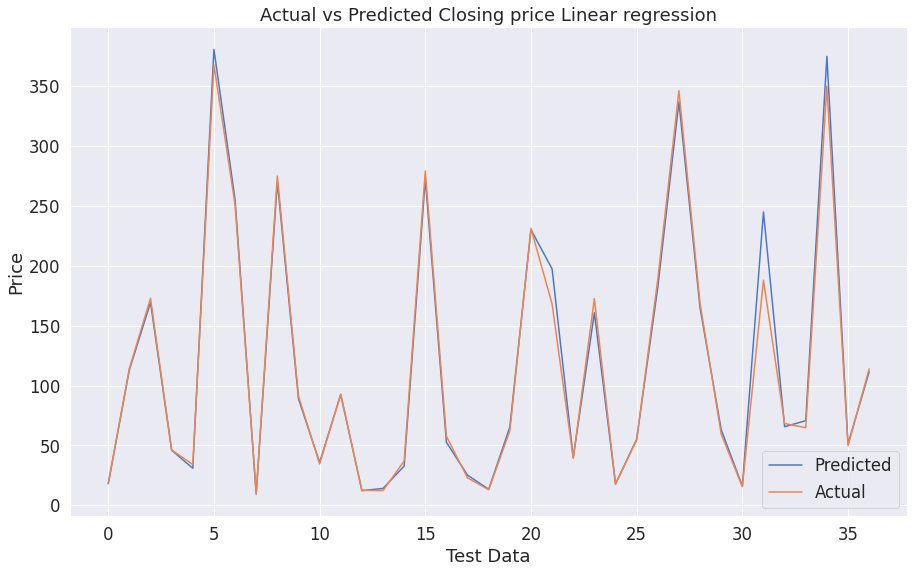

In [40]:
# Plotting the actual and predicted test data.
plt.figure(figsize=(15,9))
plt.plot(10**y_pred_test_lr)
plt.plot(np.array(10**y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('Test Data')
plt.ylabel("Price")
plt.title("Actual vs Predicted Closing price Linear regression")
plt.show()

In [41]:
## creating the dictionary 
linear_regessor_list = {'Mean squared Error' : LR_MSE,'Root Mean squared Error' : LR_RMSE,'R2 score' : LR_R2 }

In [42]:
metric_df_1 = pd.DataFrame.from_dict(linear_regessor_list, orient='index').reset_index()

In [43]:
# converting above dict into a dataframe
metric_df_1 = metric_df_1.rename(columns={'index':'Metric',0:'Linear Regression'})

metric_df_1


,Metric,Linear Regression
0,Mean squared Error,2278.395644
1,Root Mean squared Error,44.200009
2,R2 score,0.730002


#**Ridge Regression with cross validated regularization.**

In [44]:
from sklearn.linear_model import Ridge   ## importing the ridge model.
from sklearn.model_selection import GridSearchCV 
ridge = Ridge()

ridge_param_grid = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,0.3,0.7,1,1.2,1.33,1.365,1.37,1.375,1.4,1.5,1.6,1.8,2.5,5,10,20,30,40,45,50,55,60,100]}

ridge_regressor = GridSearchCV(ridge, ridge_param_grid, scoring='neg_mean_squared_error', cv=3)




In [45]:
# cross validation. 
ridge_regressor = GridSearchCV(ridge, ridge_param_grid, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(x_train_sts,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 0.3, 0.7, 1, 1.2, 1.33, 1.365, 1.37,
                                   1.375, 1.4, 1.5, 1.6, 1.8, 2.5, 5, 10, 20,
                                   30, 40, 45, 50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [46]:

# finding the best parameter value (for alpha)
ridge_regressor.best_params_


{'alpha': 0.001}

In [47]:
rig = Ridge(alpha = 0.001)   ## initializing model and giving the alpha = 0.01.

rig.fit(x_train_sts, y_train) ## fitting the model on trainig data set.

Ridge(alpha=0.001)

In [48]:
y_pred_train_rig = rig.predict(x_train_sts)

In [49]:
## lets predict the test data

y_pred_test_rig = rig.predict(x_test_sts)

In [50]:
# Evaluate the model using metrics such as MSE, RMSE, R2 score, and MASE
mse = mean_squared_error(y_test, y_pred_test_rig)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_test_rig)
mase = np.mean(np.abs((y_test - y_pred_test_rig) / y_test))

print('MSE:', mse)
print('RMSE:', rmse)
print('R2 score:', r2)
print('MASE:', mase)

MSE: 0.0010018270673374553
RMSE: 0.03165165188955318
R2 score: 0.9953847546223744
MASE: 0.012753119700193622


In [51]:
## ## cross Validating the method on testing data.
Ridge_RMSE = np.mean(np.abs(cross_val_score (rig,x_test_sts, y_pred_test_rig, scoring = "neg_root_mean_squared_error", cv = 10)))
print("Ridge_RMSE:", Ridge_RMSE)

Ridge_MSE =  np.mean(np.abs(cross_val_score (rig,x_test_sts, y_pred_test_rig, scoring = "neg_mean_squared_error", cv = 10)))
print("Ridge_MSE:", Ridge_MSE)

Ridge_R2 = np.mean(np.abs(cross_val_score (rig,x_test_sts, y_pred_test_rig, scoring = "r2", cv = 3)))
print("Ridge_R2",Ridge_R2)

Ridge_RMSE: 0.0001939795516679659
Ridge_MSE: 6.469330145028777e-08
Ridge_R2 0.9999977251985586


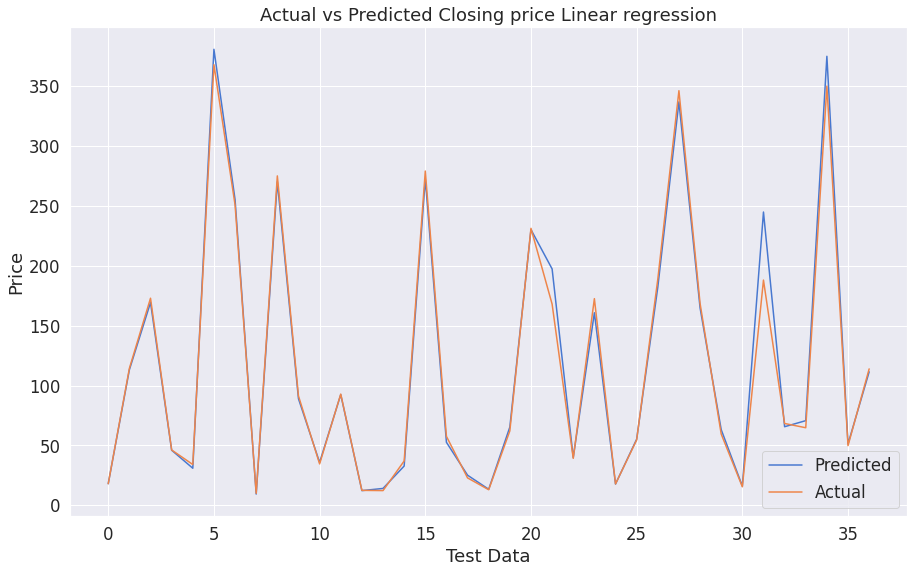

In [52]:
# Plotting the actual and predicted test data.
plt.figure(figsize=(15,9))
plt.plot(10**y_pred_test_rig)
plt.plot(np.array(10**y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('Test Data')
plt.ylabel("Price")
plt.title("Actual vs Predicted Closing price Linear regression")
plt.show()

In [53]:
## creating the dictionary 
Ridge_regessor_list = {'Mean squared Error' : Ridge_MSE,'Root Mean squared Error' : Ridge_RMSE,'R2 score' : Ridge_R2 }

In [54]:
metric_df_2 = pd.DataFrame.from_dict(Ridge_regessor_list, orient='index').reset_index()

In [55]:
# converting above dict into a dataframe
metric_df_2 = metric_df_2.rename(columns={'index':'Metric',0:'Ridge Regression'})


metric_df_2

,Metric,Ridge Regression
0,Mean squared Error,6.469330e-08
1,Root Mean squared Error,1.939796e-04
2,R2 score,9.999977e-01


#**Lasso Regression with cross validated regularization**

In [56]:
# Importing Lasso model.
from sklearn.linear_model import Lasso

In [57]:
ls = Lasso(alpha = 0.001,  max_iter = 3000)  ## Initializing the model with same base value

In [58]:
## fiting the odel on the data set

ls.fit(x_train_sts, y_train)

Lasso(alpha=0.001, max_iter=3000)

In [59]:
# Cross validation. optimizing our model by finding the best value of our hyperparameter.
from sklearn.model_selection import GridSearchCV

lasso_param_grid = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,0.005,0.006,0.007,0.01,0.015,0.02,1e-1,1,5,10,20,30,40,45,50]}  # list of parameters. 
                                                                                   
                                                                                  
lasso_regressor = GridSearchCV(ls, lasso_param_grid, scoring='neg_mean_squared_error', cv=3)
lasso_regressor.fit(x_train_sts, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.053e-02, tolerance: 1.578e-03
  model = cd_fast.enet_coordinate_descent(


GridSearchCV(cv=3, estimator=Lasso(alpha=0.001, max_iter=3000),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.005, 0.006, 0.007, 0.01, 0.015,
                                   0.02, 0.1, 1, 5, 10, 20, 30, 40, 45, 50]},
             scoring='neg_mean_squared_error')

In [60]:
lasso_regressor.best_params_     ### from this we will get base Parameter.

{'alpha': 1e-08}

In [61]:
lasso_regressor.best_score_  # finding best score.

-0.001014092055175743

In [62]:
ls = Lasso(alpha = 1e-08,  max_iter = 3000) ## tunnig Parameters 

In [63]:
ls.fit(x_train_sts, y_train)

Lasso(alpha=1e-08, max_iter=3000)

In [64]:
y_pred_train_ls = ls.predict(x_train_sts) ## predicting the test data.

In [65]:
## lets predict the test data

y_pred_test_ls = ls.predict(x_test_sts)

In [123]:
# Evaluate the model using metrics such as MSE, RMSE, R2 score, and MASE
mse = mean_squared_error(y_test, y_pred_test_ls)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_test_ls)
mase = np.mean(np.abs((y_test - y_pred_test_ls) / y_test))

print('MSE:', mse)
print('RMSE:', rmse)
print('R2 score:', r2)
print('MASE:', mase)

MSE: 0.0010023395459256368
RMSE: 0.031659746460223535
R2 score: 0.9953823937214642
MASE: 0.012754867796507039


In [124]:
## ## cross Validating the method on testing data.
Lasso_RMSE = np.mean(np.abs(cross_val_score (ls,x_test_sts,10**y_pred_test_ls, scoring = "neg_root_mean_squared_error", cv = 10)))
print("Lasso_RMSE:", Lasso_RMSE)

Lasso_MSE = np.mean(np.abs(cross_val_score (ls,x_test_sts, 10**y_pred_test_ls, scoring = "neg_mean_squared_error", cv = 10)))
print("Lasso_MSE:", Lasso_MSE)

Lasso_R2 = np.mean(np.abs(cross_val_score (ls,x_test_sts, 10**y_pred_test_ls, scoring = "r2", cv = 3)))
print("Lasso_R2",Lasso_R2)

Lasso_RMSE: 44.200009251246755
Lasso_MSE: 2278.3949726580163
Lasso_R2 0.7300067786759802


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.650e+04, tolerance: 2.694e+01
  model = cd_fast.enet_coordinate_descent(


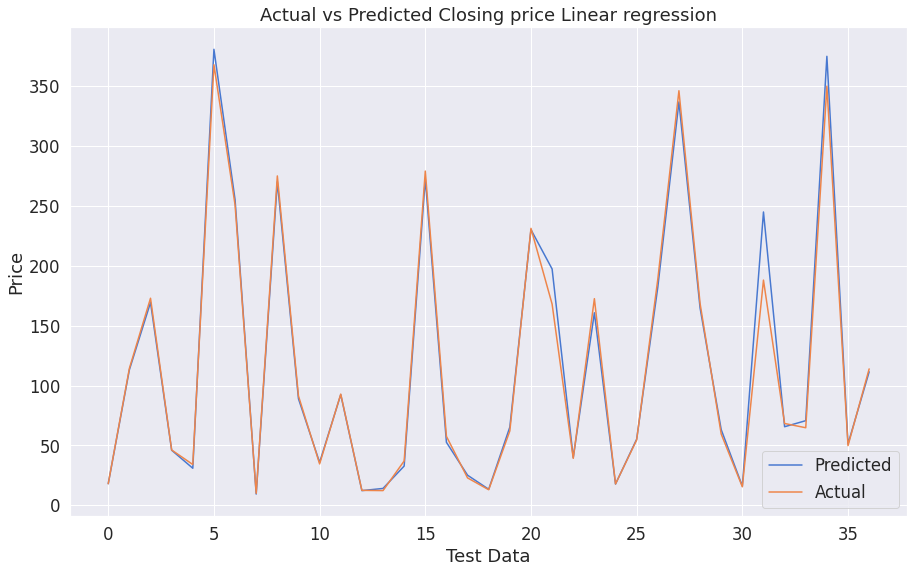

In [68]:
# Plotting the actual and predicted test data.
plt.figure(figsize=(15,9))
plt.plot(10**y_pred_test_ls)
plt.plot(np.array(10**y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('Test Data')
plt.ylabel("Price")
plt.title("Actual vs Predicted Closing price Linear regression")
plt.show()

In [69]:
## creating the dictionary 
Lasso_regessor_list = {'Mean squared Error' : Lasso_MSE,'Root Mean squared Error' : Lasso_RMSE,'R2 score' : Lasso_R2 }

In [70]:
metric_df_3 = pd.DataFrame.from_dict(Lasso_regessor_list, orient='index').reset_index()

In [71]:
# converting above dict into a dataframe
metric_df_3 = metric_df_3.rename(columns={'index':'Metric',0:'Lasso Regression'})

metric_df_3

,Metric,Lasso Regression
0,Mean squared Error,2278.256601
1,Root Mean squared Error,44.199868
2,R2 score,0.730028


#**Elastic-Net Regression with cross validation**

In [72]:
# importing and initializing Elastic-Net Regression.
from sklearn.linear_model import ElasticNet
en = ElasticNet(alpha=0.1, l1_ratio=0.5,max_iter=1000)

In [73]:
# initializing parameter grid.[0.001,0.01,0.02,0.03,0.04,1,5,10,20,40,50,60,100]
elastic_net_param_grid = {'alpha': [0.001,0.01,0.02,0.03,0.04,1,5,10,20,40,50,60,100],
                          'l1_ratio':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}

In [74]:
# cross-validation.
elasticnet_regressor = GridSearchCV(en, elastic_net_param_grid, scoring = 'r2', cv=5)
elasticnet_regressor.fit(x_train_sts, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(alpha=0.1),
             param_grid={'alpha': [0.001, 0.01, 0.02, 0.03, 0.04, 1, 5, 10, 20,
                                   40, 50, 60, 100],
                         'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                      0.9]},
             scoring='r2')

In [75]:
## findin the best Parameter
elasticnet_regressor.best_params_

{'alpha': 0.001, 'l1_ratio': 0.1}

In [76]:
## Initiating the model with the best Parameters we got 
en = ElasticNet(alpha = 0.001, l1_ratio = 0.1,max_iter=1000)

In [77]:
en.fit(x_train_sts, y_train)

ElasticNet(alpha=0.001, l1_ratio=0.1)

In [78]:
## lets predict the test data

y_pred_test_en = en.predict(x_test_sts)

In [79]:
# Evaluate the model using metrics such as MSE, RMSE, R2 score, and MASE
mse = mean_squared_error(y_test, y_pred_test_en)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_test_en)
mase = np.mean(np.abs((y_test - y_pred_test_en) / y_test))

print('MSE:', mse)
print('RMSE:', rmse)
print('R2 score:', r2)
print('MASE:', mase)

MSE: 0.0009850354665995008
RMSE: 0.03138527467777685
R2 score: 0.9954621106454002
MASE: 0.013059492549098698


In [80]:
## ## cross Validating the method on testing data.
Elastic_net_RMSE = np.mean(np.abs(cross_val_score (en,x_test_sts, y_pred_test_en, scoring = "neg_root_mean_squared_error", cv = 10)))
print("Elastic_net_RMSE:", Elastic_net_RMSE)

Elastic_net_MSE= np.mean(np.abs(cross_val_score (en,x_test_sts, y_pred_test_en, scoring = "neg_mean_squared_error", cv = 10)))
print("Elastic_net_MSE:",Elastic_net_MSE )

Elastic_net_R2 = np.mean(np.abs(cross_val_score (en,x_test_sts, y_pred_test_en, scoring = "r2", cv = 3)))
print("Elastic_net_R2",Elastic_net_R2)





Elastic_net_RMSE: 0.0057147159565193555
Elastic_net_MSE: 5.3390229521286595e-05
Elastic_net_R2 0.9992183642377405


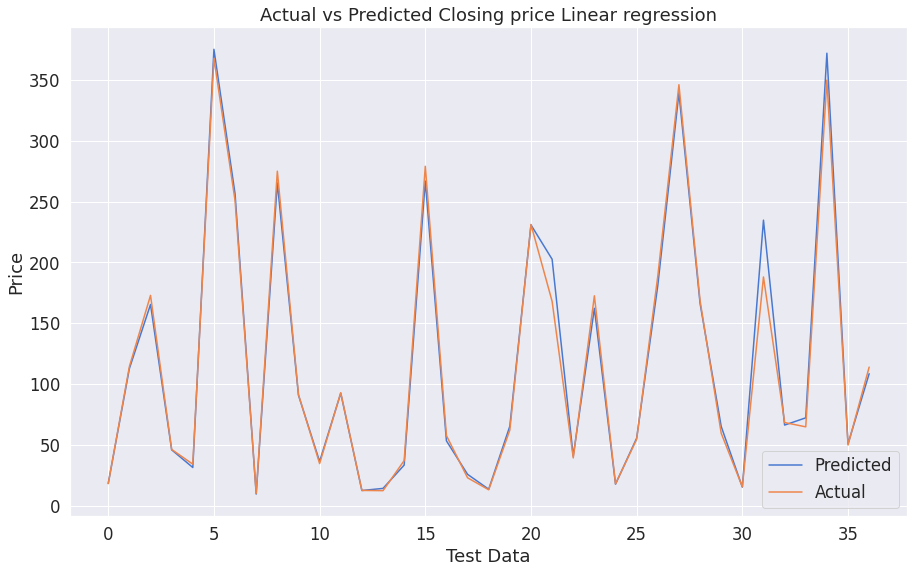

In [81]:
# Plotting the actual and predicted test data.
plt.figure(figsize=(15,9))
plt.plot(10**y_pred_test_en)
plt.plot(np.array(10**y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('Test Data')
plt.ylabel("Price")
plt.title("Actual vs Predicted Closing price Linear regression")
plt.show()

In [82]:
## creating the dictionary 
en_regessor_list = {'Mean squared Error' : Elastic_net_MSE,'Root Mean squared Error' : Elastic_net_RMSE,'R2 score' : Elastic_net_R2 }

In [83]:
##resetting index.
metric_df_4 = pd.DataFrame.from_dict(en_regessor_list, orient='index').reset_index()

In [84]:
# converting above dict into a dataframe
metric_df_4 = metric_df_4.rename(columns={'index':'Metric',0:'Elastic net Regression'})
metric_df_4


,Metric,Elastic net Regression
0,Mean squared Error,0.000053
1,Root Mean squared Error,0.005715
2,R2 score,0.999218


Note- Multicollinearity occurs when two or more predictors in a linear regression model are highly correlated with each other, making it difficult for the algorithm to determine their individual effects on the outcome variable. This can lead to unstable or unreliable coefficient estimates, and can cause the algorithm to converge to a suboptimal solution or not converge at all.

#**Decision Tree Regressor**

In [85]:
from sklearn.tree import DecisionTreeRegressor ## Importing the library 

In [86]:
dtr = DecisionTreeRegressor()  ##initializing the model

In [87]:
dtr.fit(x_train_sts, y_train) ## fitting the model

DecisionTreeRegressor()

In [88]:
y_pred_train_dtr = dtr.predict(x_train_sts)  ## Predicting the trainin data.

In [89]:
y_pred_test_dtr = dtr.predict(x_test_sts)  ## Predicting the Data.

In [90]:
# Evaluate the model using metrics such as MSE, RMSE, R2 score, and MASE
mse = mean_squared_error(y_test, y_pred_test_dtr)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_test_dtr)
mase = np.mean(np.abs((y_test - y_pred_test_dtr) / y_test))

print('MSE:', mse)
print('RMSE:', rmse)
print('R2 score:', r2)
print('MASE:', mase)

MSE: 0.0033060287386887967
RMSE: 0.057498075956407414
R2 score: 0.9847696929420343
MASE: 0.023007959329890693


In [91]:
## ## cross Validating the method on testing data.
dtr_RMSE = np.mean(np.abs(cross_val_score (dtr,x_test_sts, 10**y_pred_test_dtr, scoring = "neg_root_mean_squared_error", cv = 3)))
print("dtr_RMSE:",dtr_RMSE)

dtr_MSE = np.mean(np.abs(cross_val_score (dtr,x_test_sts,10**y_pred_test_dtr, scoring = "neg_mean_squared_error", cv = 3)))
print("dtr_MSE:",dtr_MSE)

dtr_R2 = np.mean(np.abs(cross_val_score (dtr,x_test_sts, 10**y_pred_test_dtr, scoring = "r2", cv = 3)))
print("dtr_R2",dtr_R2)

dtr_RMSE: 10.058085267653794
dtr_MSE: 147.89484252136728
dtr_R2 0.9433709454801935


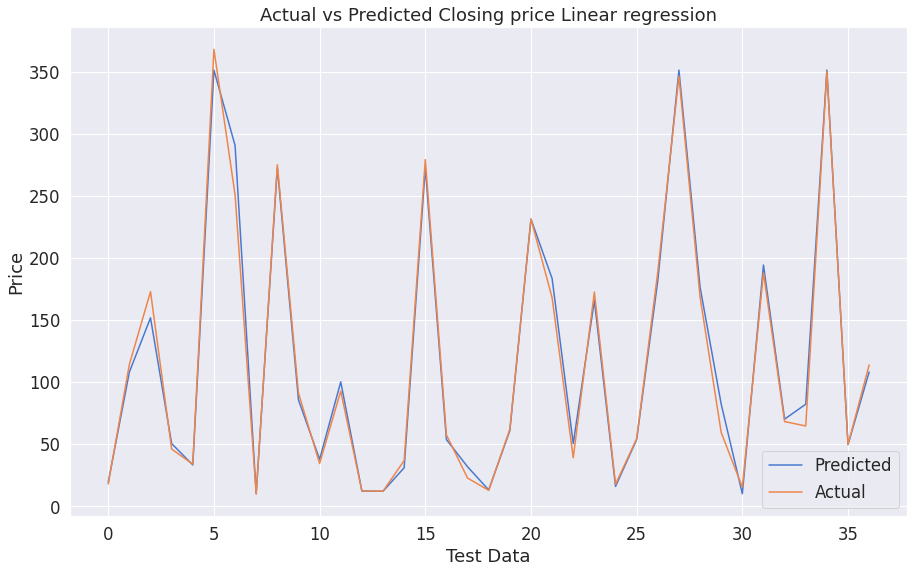

In [92]:
# Plotting the actual and predicted test data.
plt.figure(figsize=(15,9))
plt.plot(10**y_pred_test_dtr)
plt.plot(np.array(10**y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('Test Data')
plt.ylabel("Price")
plt.title("Actual vs Predicted Closing price Linear regression")
plt.show()

In [93]:
## creating the dictionary 
DTR_regessor_list = {'Mean squared Error' : dtr_MSE,'Root Mean squared Error' : dtr_RMSE,'R2 score' : dtr_R2 }

In [94]:
metric_df_5 = pd.DataFrame.from_dict(DTR_regessor_list, orient='index').reset_index()

In [95]:
# converting above dict into a dataframe
metric_df_5 = metric_df_5.rename(columns={'index':'Metric',0:'DecisionTreeRegressor'})

metric_df_5

,Metric,DecisionTreeRegressor
0,Mean squared Error,147.894843
1,Root Mean squared Error,10.058085
2,R2 score,0.943371


#**Random Forest Regression**

In [96]:
from sklearn.ensemble import RandomForestRegressor ## Importing the library 

In [97]:
rf = RandomForestRegressor(n_estimators=100, random_state=0)  ##initializing the model

In [98]:
rf.fit(x_train_sts, y_train) ## fitting the model

RandomForestRegressor(random_state=0)

In [99]:
y_pred_train_rf = rf.predict(x_train_sts)  ## Predicting the trainin data.

In [100]:
y_pred_test_rf = rf.predict(x_test_sts)  ## Predicting the Data.

In [101]:
# Evaluate the model using metrics such as MSE, RMSE, R2 score, and MASE
mse = mean_squared_error(y_test, y_pred_test_rf)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_test_rf)
mase = np.mean(np.abs((y_test - y_pred_test_rf) / y_test))

print('MSE:', mse)
print('RMSE:', rmse)
print('R2 score:', r2)
print('MASE:', mase)

MSE: 0.002316007461571101
RMSE: 0.04812491518507956
R2 score: 0.9893305510700862
MASE: 0.02124680079625999


In [102]:
## ## cross Validating the method on testing data.
rf_RMSE = np.mean(np.abs(cross_val_score (rf,x_test_sts, 10**y_pred_test_rf, scoring = "neg_root_mean_squared_error", cv = 3)))
print("rf_RMSE:", rf_RMSE)

rf_MSE = np.mean(np.abs(cross_val_score (rf,x_test_sts, 10**y_pred_test_rf, scoring = "neg_mean_squared_error", cv = 3)))
print("rf_MSE:",rf_MSE)

rf_R2 = np.mean(np.abs(cross_val_score (rf,x_test_sts, 10**y_pred_test_rf, scoring = "r2", cv = 3)))
print("rf_R2",rf_R2)

rf_RMSE: 13.885458758994197
rf_MSE: 192.95817097543684
rf_R2 0.9808158985686276


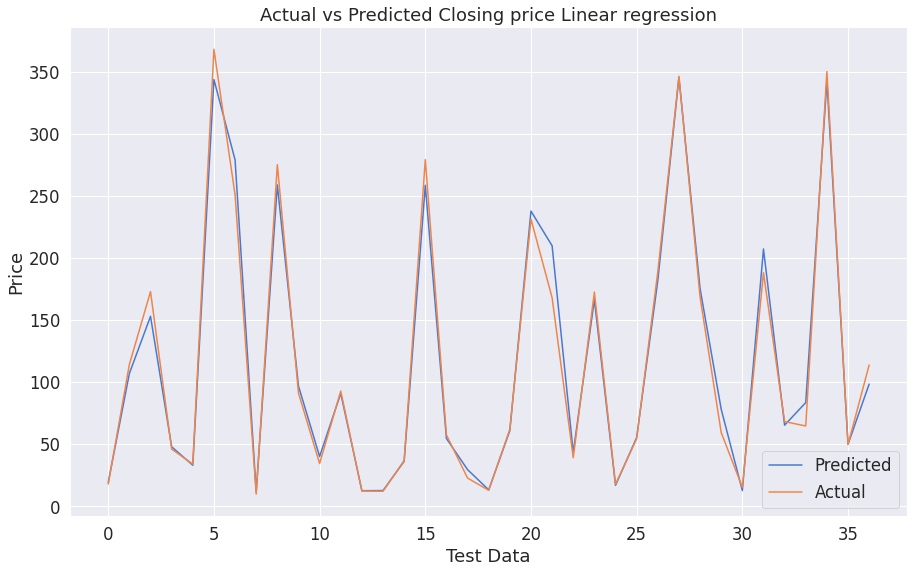

In [103]:
# Plotting the actual and predicted test data.
plt.figure(figsize=(15,9))
plt.plot(10**y_pred_test_rf)
plt.plot(np.array(10**y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('Test Data')
plt.ylabel("Price")
plt.title("Actual vs Predicted Closing price Linear regression")
plt.show()

In [104]:
## creating the dictionary 
rf_regessor_list = {'Mean squared Error' : rf_MSE,'Root Mean squared Error' : rf_RMSE,'R2 score' : rf_R2,  }

In [121]:
# converting above dict into a dataframe
metric_df_6 = pd.DataFrame.from_dict(rf_regessor_list, orient='index').reset_index()

In [122]:
# converting above dict into a dataframe
metric_df_6 = metric_df_6.rename(columns={'index':'Metric',0:'Random_forest_regressor'})

metric_df_6

,Metric,Random_forest_regressor
0,Mean squared Error,192.958171
1,Root Mean squared Error,13.885459
2,R2 score,0.980816


In [107]:
metrix_list = [metric_df_1, metric_df_2, metric_df_3, metric_df_4, metric_df_5, metric_df_6]

In [108]:
import pandas as pd
from functools import reduce

Metrics_ = reduce(lambda left, right: pd.merge(left, right, on='Metric'), metrix_list)

In [109]:
Metrics_.T

,0,1,2
Metric,Mean squared Error,Root Mean squared Error,R2 score
Linear Regression,2278.395644,44.200009,0.730002
Ridge Regression,0.0,0.000194,0.999998
Lasso Regression,2278.256601,44.199868,0.730028
Elastic net Regression,0.000053,0.005715,0.999218
DecisionTreeRegressor,147.894843,10.058085,0.943371
Random_forest_regressor,192.958171,13.885459,0.980816


Text(0.5, 1.0, 'Actual vs Predicted Closing Price values by various Algorithms')

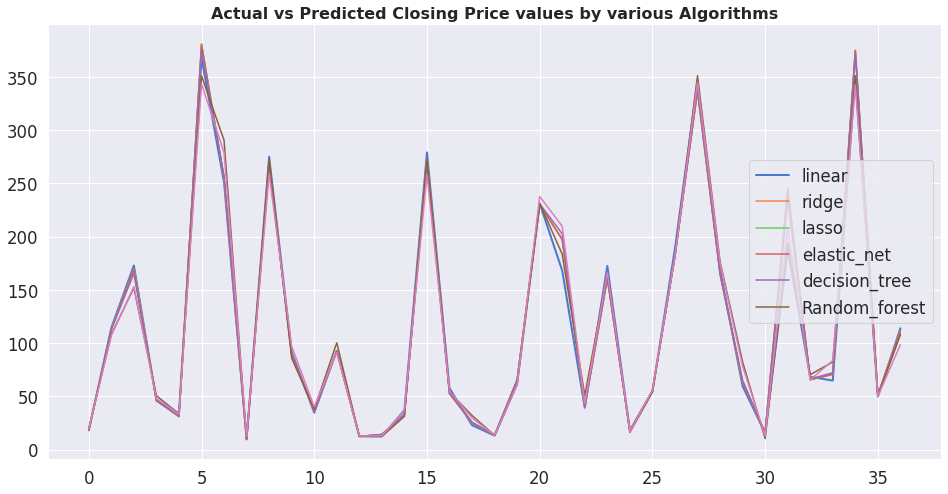

In [110]:
# Plotting the predicted values of all the models against the true values.
plt.figure(figsize=(16,8))
plt.plot(10**y_test, linewidth=2)
plt.plot(10**y_pred_test_lr)
plt.plot(10**y_pred_test_rig)
plt.plot(10**y_pred_test_ls)
plt.plot(10**y_pred_test_en)
plt.plot(10**y_pred_test_dtr)
plt.plot(10**y_pred_test_rf)
plt.legend(['linear','ridge','lasso','elastic_net', "decision_tree",'Random_forest' ])
plt.title('Actual vs Predicted Closing Price values by various Algorithms', weight = 'bold',fontsize=16)

# **Conclusion**

After analyzing the Yes Bank stock price data, we can draw the following conclusions:

* Yes Bank's stock price experienced significant fluctuations between 2005 to 2020, indicating a volatile market.

* The monthly moving average analysis suggests that the stock price was declining consistently over time.

* The correlation analysis shows that there is a strong positive correlation between the Open, High, Low, and Close variables, indicating that they all move in the same direction.

* The data is positively skewed and has outliers, indicating that some data points are very different from the others. This indicates that the data might not be normally distributed and needs to be treated before fitting the model.

* The regression analysis shows that the model can predict the closing price of the stock with a reasonable degree of accuracy. However, the model can be improved by tuning the hyperparameters and using different algorithms.


* Overall, the project provides insights into the stock price behavior of Yes Bank, which can be useful for investors and traders in making informed decisions. The project also highlights the importance of data analysis and modeling in understanding the financial market and predicting future trends.

# **Future Scope**

* Based on the analysis performed, there are a few areas that could be explored further:

* Time series modeling: The current analysis focused on descriptive statistics and regression modeling to predict the closing price. However, there is scope to explore time series modeling techniques such as ARIMA or Prophet to better capture the temporal dependencies and trends in the data.

* Feature engineering: The current analysis used only the Open, High, and Low prices as features for the regression model. However, there may be additional features that could be engineered from the data such as trading volumes, news sentiment, or macroeconomic indicators that could improve the model's predictive power.

* Ensemble methods: Another area of exploration could be to use ensemble methods such as random forests or gradient boosting to combine the predictions of multiple models and potentially improve the overall performance.

* External data sources: Finally, incorporating external data sources such as social media sentiment or news articles related to Yes Bank or the banking industry could provide additional insights and potentially improve the model's performance.
